In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn import datasets

In [39]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]

In [40]:
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)


# we will only focus on Iris-setosa and Iris-Versicolor

In [41]:
data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2] # we will only focus on Iris-setosa and Iris-Versicolor
data.head()

,petal length,petal width,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


In [42]:
# Checking for null values
data.isnull().sum()

petal length    0
petal width     0
target          0
dtype: int64

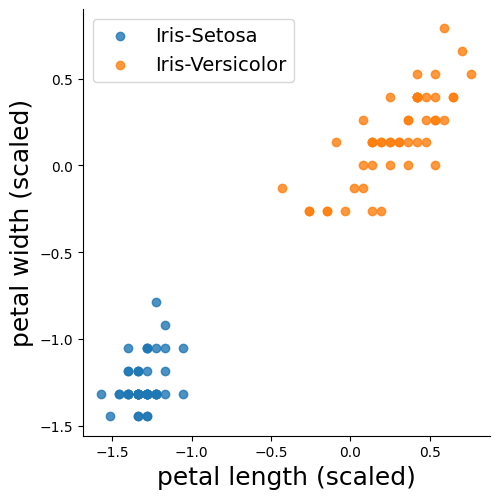

In [43]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()

In [44]:
X=data.drop(['target'],axis='columns')

In [45]:
y=data.target

In [80]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [81]:
len(X_train)

70

In [82]:
len(X_test)

30

In [83]:
svc = LinearSVC(C=1,loss="hinge")
svc.fit(X_train,y_train)

C:\Users\emoha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=1, loss='hinge')

In [84]:
# get the parameters
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]
x0 = np.linspace(-1.7, 0.7, num=100)
# decision boundary
x1_decision = -b/w1 - w0/w1*x0
# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin 
x1_minus = x1_decision - 1/w1

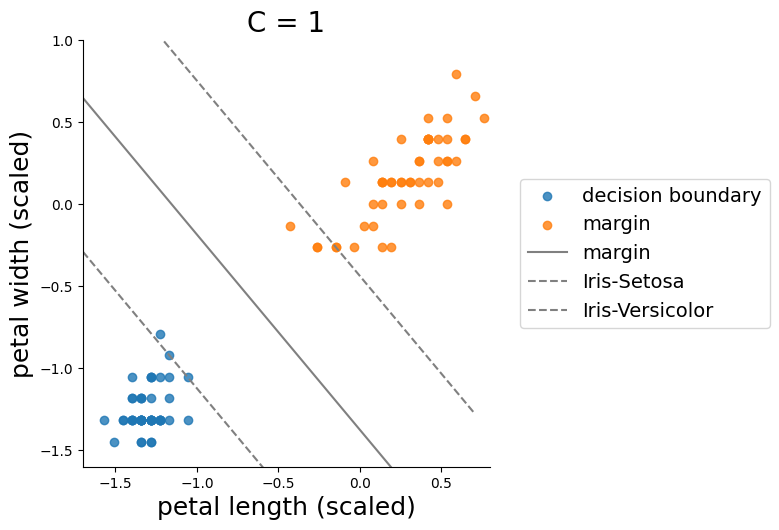

In [85]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','Iris-Setosa','Iris-Versicolor'], fontsize = 14, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.title('C = 1', fontsize = 20)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

In [92]:
svc.score(X_test, y_test)

1.0

In [93]:
from sklearn.metrics import precision_score, accuracy_score

In [94]:
y_true, y_pred = y_test, svc.predict(X_test)
print('precision on the evaluation set: ', precision_score(y_true, y_pred))
print('accuracy on the evaluation set: ', accuracy_score(y_true, y_pred))

precision on the evaluation set:  1.0
accuracy on the evaluation set:  1.0


performing gradient descent algorithm

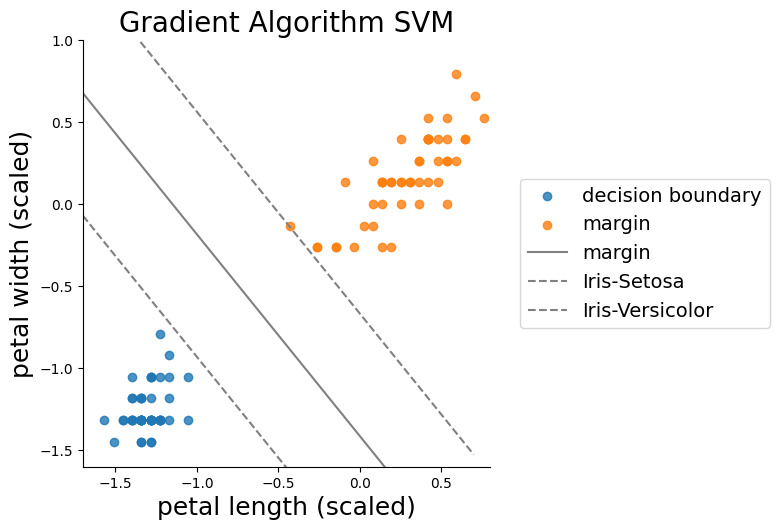

In [96]:
from sklearn.linear_model import SGDClassifier
# Create the SGDClassifier with 'hinge' loss for linear SVM
svm = SGDClassifier(loss='hinge', alpha=0.01, max_iter=1000, tol=1e-3)
# Fit the model
svm.fit(X_train, y_train)


# Get the parameters
w0, w1 = svm.coef_[0]
b = svm.intercept_[0]
# Create the decision boundary
x0 = np.linspace(-1.7, 0.7, num=100)
x1_decision = -b / w1 - w0 / w1 * x0
# Calculate margins
x1_plus = x1_decision + 1 / w1
x1_minus = x1_decision - 1 / w1

# Plot the decision boundary and margins
sns.lmplot(x='petal length', y='petal width', hue='target', data=data, fit_reg=False, legend=False)
plt.plot(x0, x1_decision, color='grey')
plt.plot(x0, x1_plus, x0, x1_minus, color='grey', linestyle='--')
plt.legend(['decision boundary', 'margin', 'margin', 'Iris-Setosa', 'Iris-Versicolor'], fontsize=14, loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.xlabel('petal length (scaled)', fontsize=18)
plt.ylabel('petal width (scaled)', fontsize=18)
plt.title('Gradient Algorithm SVM', fontsize=20)
plt.ylim(-1.6, 1)
plt.xlim(-1.7, 0.8)
plt.show()


In [70]:
#print intermediate value for debugging

In [97]:
y_true, y_pred = y_test, svm.predict(X_test)
print('precision on the evaluation set: ', precision_score(y_true, y_pred))
print('accuracy on the evaluation set: ', accuracy_score(y_true, y_pred))

precision on the evaluation set:  1.0
accuracy on the evaluation set:  1.0
